In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
customer_data = pd.read_csv("Resources/customer_shopping_data.csv")
customer_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [16]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [17]:
customer_data['invoice_date'] = pd.to_datetime(customer_data['invoice_date'], format='%d/%m/%Y')
customer_data.dtypes

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

# Descriptive Analysis:

## Analyze the distribution of customers by age and gender

In [18]:
# Set style
sns.set_style("whitegrid")

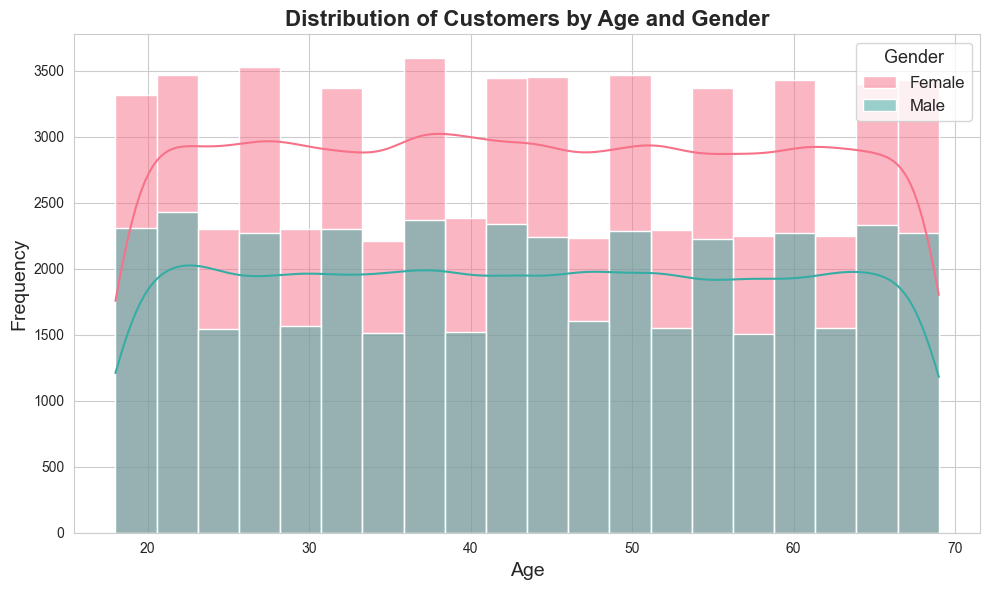

In [33]:
# Define HUSL colors for Female and Male
colors = sns.color_palette("husl", 2)

# Plot Female data
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_data[customer_data['gender'] == 'Female'], x='age', bins=20, kde=True, color=colors[0], alpha=0.5, label='Female')

# Plot Male data
sns.histplot(data=customer_data[customer_data['gender'] == 'Male'], x='age', bins=20, kde=True, color=colors[1], alpha=0.5, label='Male')

# Add legend
plt.legend(title='Gender', title_fontsize='13', fontsize='12')

# Add titles and labels
plt.title('Distribution of Customers by Age and Gender', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

## Explore the most popular product categories and their sales volumes

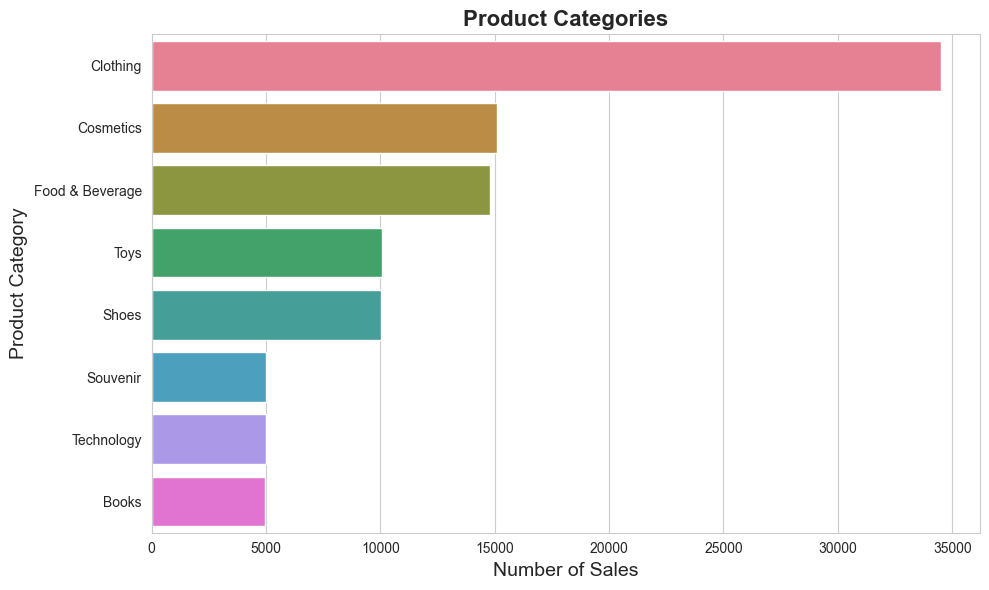

In [22]:
# Get category counts
categories = customer_data['category'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=categories.values, y=categories.index, hue=categories.index, palette='husl', dodge=False, legend=False)

# Add titles and labels
plt.title('Product Categories', fontsize=16, fontweight='bold')
plt.xlabel('Number of Sales', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.tight_layout()
plt.show()

## Investigate the preferred payment methods across different demographics

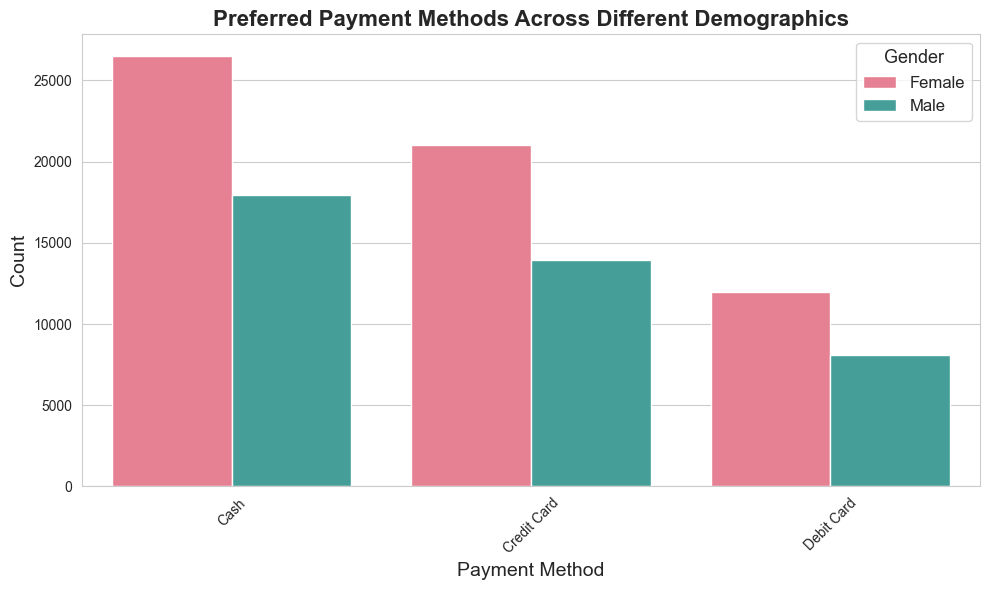

In [31]:
# Assuming your DataFrame is named df
payment_demographics = customer_data.groupby(['payment_method', 'gender']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_demographics, x='payment_method', y='count', hue='gender', palette='husl', dodge=True)

# Add titles and labels
plt.title('Preferred Payment Methods Across Different Demographics', fontsize=16, fontweight='bold')
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Show legend
plt.legend(title='Gender', title_fontsize='13', fontsize='12')

plt.tight_layout()
plt.show()

## Examine the distribution of shopping activities across various shopping malls

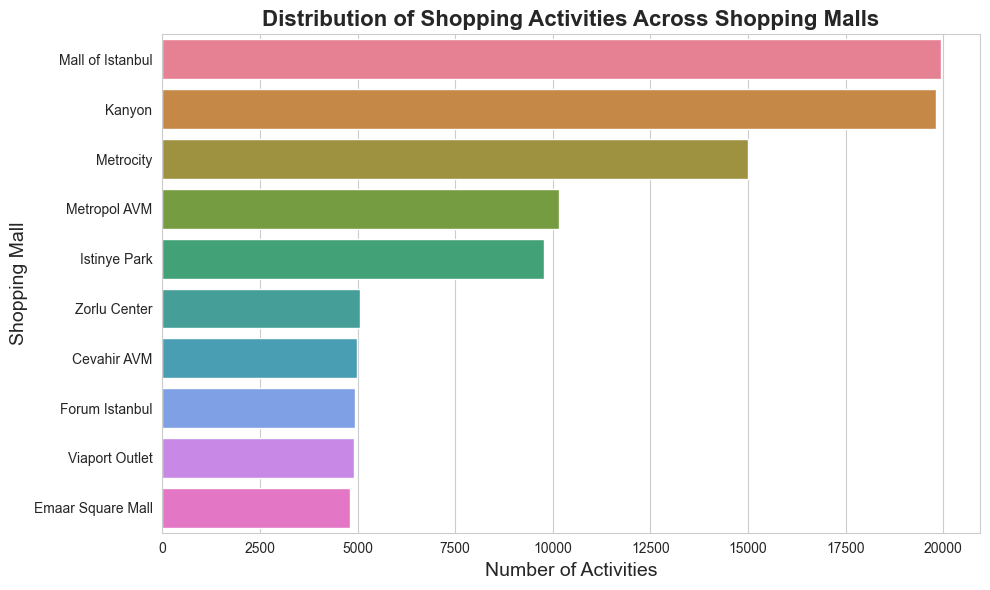

In [37]:
# Get shopping mall distribution
shopping_mall_distribution = customer_data['shopping_mall'].value_counts()

# Define HUSL color palette
colors = sns.color_palette("husl", n_colors=len(shopping_mall_distribution))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=shopping_mall_distribution.values, y=shopping_mall_distribution.index, hue=shopping_mall_distribution.index, palette=colors, dodge=False, legend=False)
plt.title('Distribution of Shopping Activities Across Shopping Malls', fontsize=16, fontweight='bold')
plt.xlabel('Number of Activities', fontsize=14)
plt.ylabel('Shopping Mall', fontsize=14)
plt.tight_layout()
plt.show()

# Temporal Analysis:

## Analyze shopping trends over time (monthly, quarterly, daily) to identify seasonal patterns.

In [42]:
# Extract month and quarter from 'invoice_date'
customer_data['month'] = customer_data['invoice_date'].dt.month
customer_data['quarter'] = customer_data['invoice_date'].dt.quarter
customer_data['day_of_week'] = customer_data['invoice_date'].dt.dayofweek  # Monday=0, Sunday=6

In [43]:
# Group by month
monthly_shopping = customer_data.groupby('month').size()

# Group by quarter
quarterly_shopping = customer_data.groupby('quarter').size()

# Group by day of the week
daily_shopping = customer_data.groupby('day_of_week').size()

## Monthly Shopping Analysis

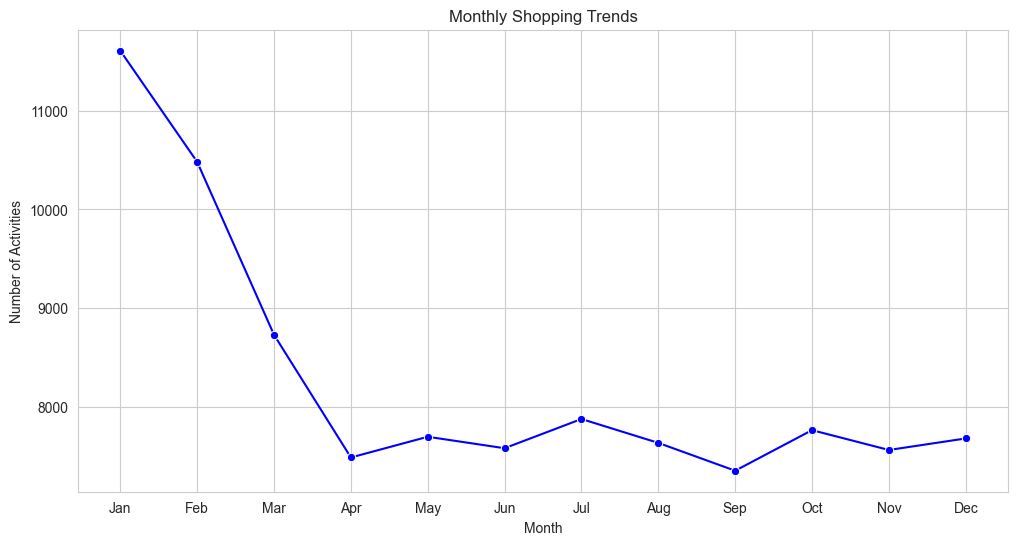

In [45]:
# Plot monthly shopping trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_shopping, marker='o', color='b')
plt.title('Monthly Shopping Trends')
plt.xlabel('Month')
plt.ylabel('Number of Activities')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

## Quarterly Shopping Analysis

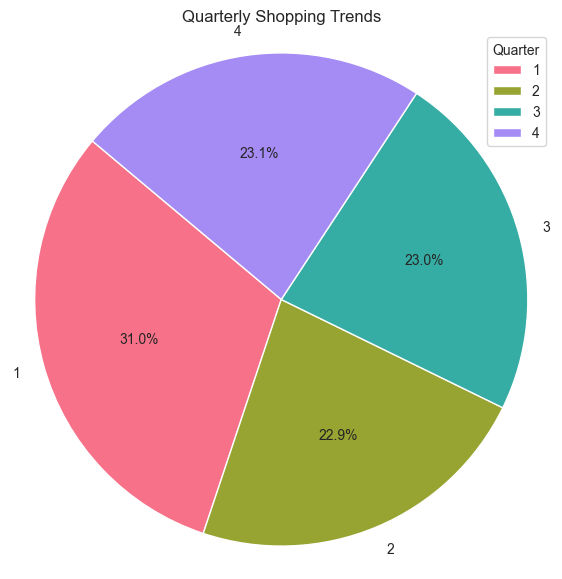

In [61]:
colors1 = sns.color_palette("husl", n_colors=len(quarterly_shopping))

# Plot quarterly shopping trends as a pie chart
plt.figure(figsize=(7, 7))
plt.pie(quarterly_shopping.values, labels=quarterly_shopping.index, colors=colors1, autopct='%1.1f%%', startangle=140)
plt.title('Quarterly Shopping Trends')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend
plt.legend(title='Quarter', labels=quarterly_shopping.index, loc='upper right')
plt.show()

## Daily Shopping Analysis

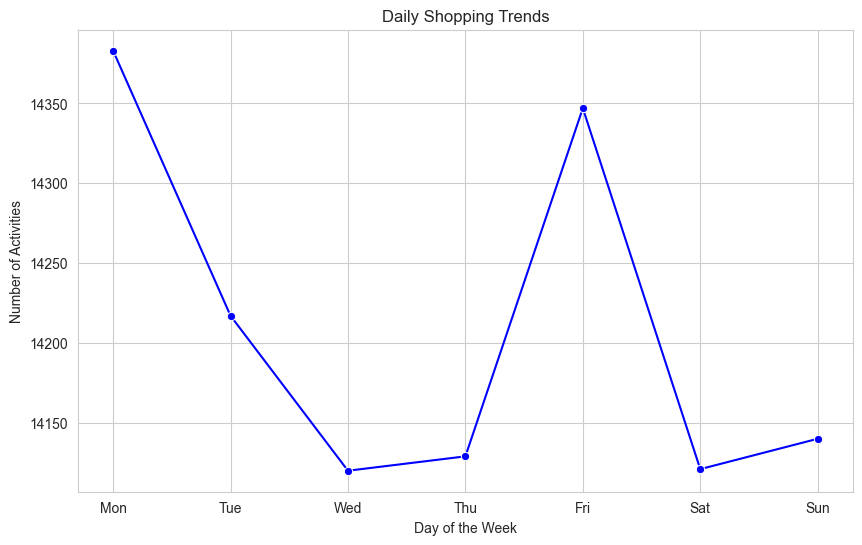

In [55]:
# Plot daily shopping trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_shopping, marker='o', color='b')
plt.title('Daily Shopping Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Activities')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

## Determine if there are any noticeable changes in shopping behavior between 2021 and 2022.

In [67]:
# Filter data for years 2021 and 2022
customer_data_2021 = customer_data[customer_data['invoice_date'].dt.year == 2021]
customer_data_2022 = customer_data[customer_data['invoice_date'].dt.year == 2022]

# Group by month for each year
monthly_shopping_2021 = customer_data_2021.groupby(customer_data_2021['invoice_date'].dt.month).size()
monthly_shopping_2022 = customer_data_2022.groupby(customer_data_2022['invoice_date'].dt.month).size()

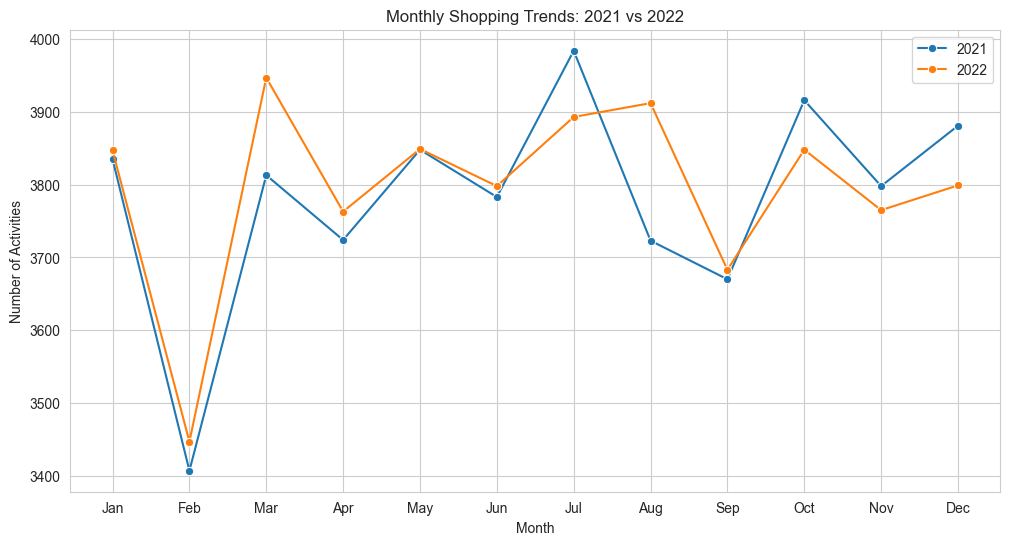

In [69]:
# Plot monthly shopping trends for 2021 and 2022
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_shopping_2021, marker='o', label='2021')
sns.lineplot(data=monthly_shopping_2022, marker='o', label='2022')
plt.title('Monthly Shopping Trends: 2021 vs 2022')
plt.xlabel('Month')
plt.ylabel('Number of Activities')
plt.legend()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()